For that lab we will need keras, so go to your python.exe location and run:

`python -m pip install keras`

That will install keras and tensorflow libraries for you.

For model visualization we will also need [graphviz](https://graphviz.gitlab.io/_pages/Download/Download_windows.html) lib, so also please navigate to the link and install it, also adding it ti PATH variable.

We will work firstly with pretrained model:

In [1]:
import keras

model = keras.applications.vgg16.VGG16()

Using TensorFlow backend.


### Getting weight and layers data 

Let us visualize this model

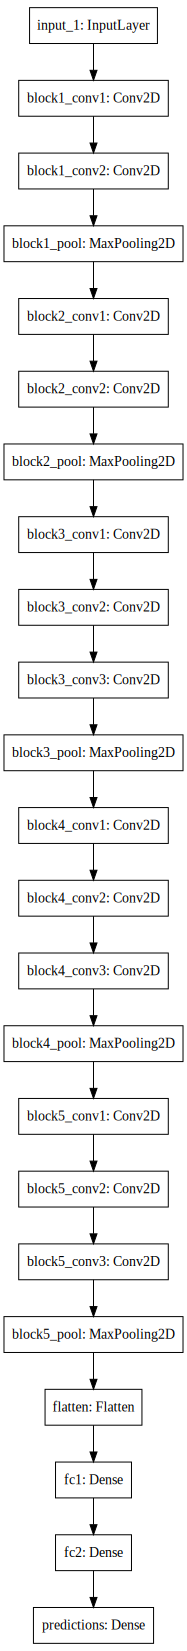

In [2]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

And also see the shapes of weights

In [3]:
weights = model.get_weights()
for weight in weights:
    print(weight.shape)

(3, 3, 3, 64)
(64,)
(3, 3, 64, 64)
(64,)
(3, 3, 64, 128)
(128,)
(3, 3, 128, 128)
(128,)
(3, 3, 128, 256)
(256,)
(3, 3, 256, 256)
(256,)
(3, 3, 256, 256)
(256,)
(3, 3, 256, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(25088, 4096)
(4096,)
(4096, 4096)
(4096,)
(4096, 1000)
(1000,)


In [4]:
layers = model.layers
for layer in layers:
    print(layer, layer.name)
    
print(layers[0])

<keras.engine.topology.InputLayer object at 0x10c40fba8> input_1
<keras.layers.convolutional.Conv2D object at 0x127405518> block1_conv1
<keras.layers.convolutional.Conv2D object at 0x127290fd0> block1_conv2
<keras.layers.pooling.MaxPooling2D object at 0x127422fd0> block1_pool
<keras.layers.convolutional.Conv2D object at 0x127454d30> block2_conv1
<keras.layers.convolutional.Conv2D object at 0x127467160> block2_conv2
<keras.layers.pooling.MaxPooling2D object at 0x127479e48> block2_pool
<keras.layers.convolutional.Conv2D object at 0x12749f5f8> block3_conv1
<keras.layers.convolutional.Conv2D object at 0x12746deb8> block3_conv2
<keras.layers.convolutional.Conv2D object at 0x1274c7f28> block3_conv3
<keras.layers.pooling.MaxPooling2D object at 0x1274d2c18> block3_pool
<keras.layers.convolutional.Conv2D object at 0x1274fd6a0> block4_conv1
<keras.layers.convolutional.Conv2D object at 0x1274fd940> block4_conv2
<keras.layers.convolutional.Conv2D object at 0x127527fd0> block4_conv3
<keras.layers.p

You might notice that the number of weights is greater than the number of layers. This is because we also have bias weights, in which we are not currently inerested in.

### Task 1 
Visualize weights from the input layer

(3, 3, 3, 64)
(64, 3, 3, 3)


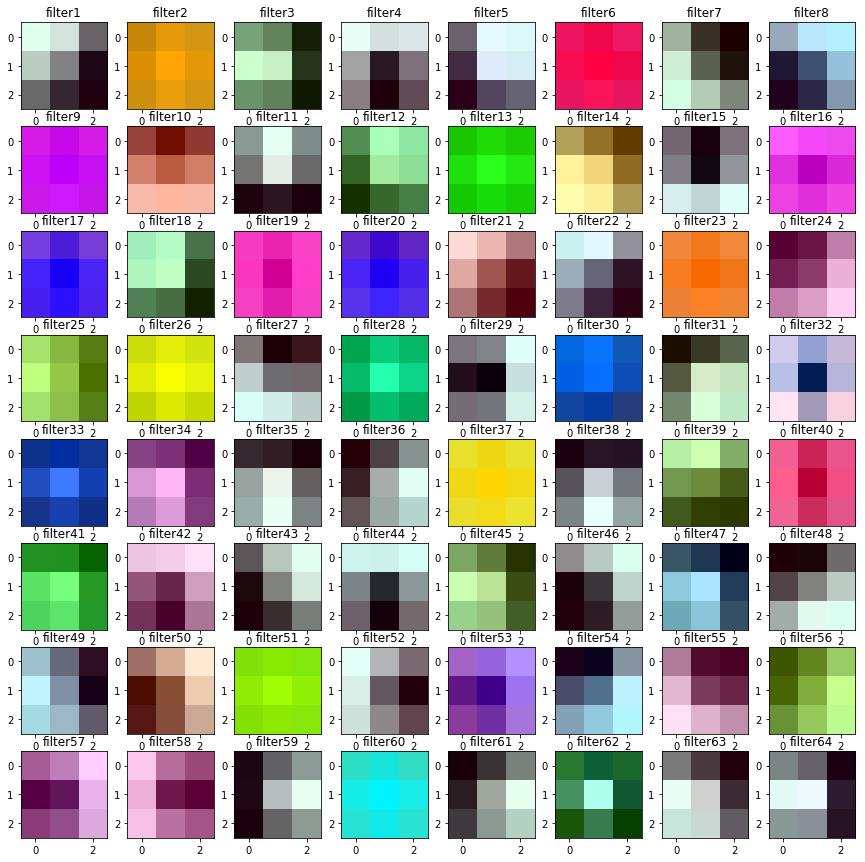

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# your code to get filter from weights and than transform to the shape, that is compatible with cv2
# please notice the shape of the layer 
input_weights = model.layers[1].get_weights()[0]
input_weights = np.asarray(input_weights)
print(input_weights.shape)
input_weights = np.transpose(input_weights, [3, 0, 1, 2])
print(input_weights.shape)

img = input_weights[0].copy()

# plot the 64 filters
fig2 = plt.figure(figsize=(15, 15))
for i in range(64):
    img2 = input_weights[i].copy()
    cv2.normalize(img2,  img2, 0, 255, cv2.NORM_MINMAX)
    ax2 = fig2.add_subplot(8,8,i+1)
    ax2.imshow(img2.astype('uint8'))
    ax2.set_title('filter' + str(i+1))

### Task 2

Feed an image to the model and get an output image from some layer

You can see the output from each layer using this [guide](https://stackoverflow.com/a/41712013)

In [6]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.models import Model

In [15]:
image_path = 'openCV-data/mug.jpg'

# load an image from file
img = load_img(image_path, target_size=(224, 224, 3))
# convert the image pixels to a numpy array
img = img_to_array(img)
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))

# prepare the image for the VGG model
img = preprocess_input(img)

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
y = model.predict(image)

In [18]:
layer_outputs = [layer.output for layer in model.layers[1:]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img)
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    print (activation.shape)
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

(1, 224, 224, 64)


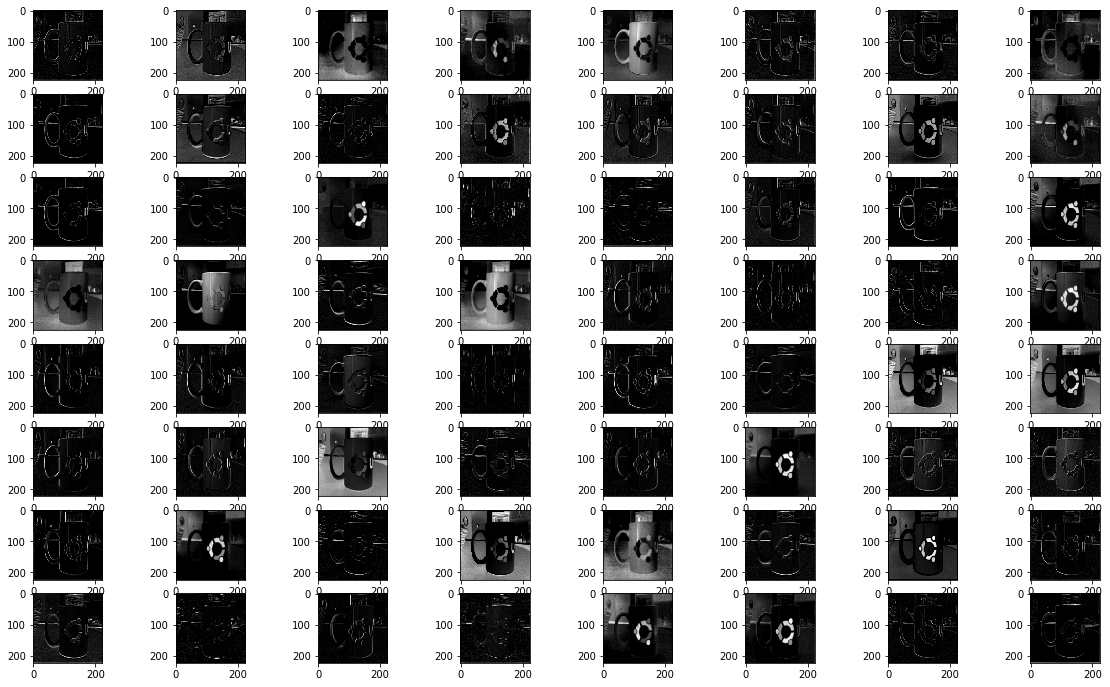

In [19]:
display_activation(activations, 8, 8, 1)

### Task 3 

Classify cats and dogs images with [features from CNN](https://keras.io/applications/#extract-features-with-vgg16) using SVM/KNN/etc...

In [191]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = 'cats_dogs/cats/1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features1 = model.predict(x)

In [192]:
data = np.empty(features1.shape)
labels = []
labels

[]

In [193]:
import os

src = 'cats_dogs/cats/'
src_files = os.listdir(src)

for file in src_files:
    full_file_name = os.path.join(src, file)
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    data = np.append(data, features, axis=0)
    labels.append(1)

In [194]:
data.shape

(51, 7, 7, 512)

In [195]:
src = 'cats_dogs/dogs/'
src_files = os.listdir(src)

for file in src_files:
    full_file_name = os.path.join(src, file)
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    data = np.append(data, features, axis=0)
    labels.append(2)

In [196]:
labels # convert to array
labels = np.asarray(labels)
data = data[1: ,:,:,:]
data = np.reshape(data, (data.shape[0], -1))
print(labels.shape, data.shape)

(100,) (100, 25088)


In [197]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [199]:
y_train

array([2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2])

In [200]:
# SVM (GAUSIAN KERNEL)
from sklearn.svm import SVC

svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [201]:
from sklearn.metrics import classification_report

score = svclassifier.score(X_test, y_test)
print('Model Accuracy:', (score*100), '%')

Model Accuracy: 40.0 %


In [202]:
predicted = svclassifier.predict(X_test)
report = classification_report(y_test, predicted)
print(report)

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        12
          2       0.40      1.00      0.57         8

avg / total       0.16      0.40      0.23        20



/Users/juan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [203]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [204]:
score = logreg.score(X_test, y_test)
print('Model Accuracy:', (score*100), '%')

Model Accuracy: 40.0 %


In [205]:
predicted = logreg.predict(X_test)
report = classification_report(y_test, predicted)
print(report)

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        12
          2       0.40      1.00      0.57         8

avg / total       0.16      0.40      0.23        20



/Users/juan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Building your own model

Consider the NON-working example below (x_train not defined)

In [22]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

model = Sequential() # initialize linear stacked model
# create first conv layer and provide input shapes (other shapes will be calculated automatically)
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:])) 
# set activation function for the layer
model.add(Activation('relu'))
#repeat
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
# first maxpooling layer with 2x2 window
model.add(MaxPooling2D(pool_size=(2, 2)))
# set dropout to 25% of neurons number
model.add(Dropout(0.25))

# flatten convert ndarray fron the prev layer to 1D vector
model.add(Flatten())
# fully connected layer with 512 neurons
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

NameError: name 'x_train' is not defined

### Task 4

Create your own simple architecture and train CNN on [MNIST](https://keras.io/datasets/#mnist-database-of-handwritten-digits) dataset. Note that MNIST is 1 color channel dataset.
Test it on some hard images from the web, [such as](https://www.wpclipart.com/education/animal_numbers/animal_number_2.png).

In [23]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [24]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [25]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 31s 518us/step - loss: 0.1754 - acc: 0.9444
Epoch 2/5
60000/60000 [==============================] - 31s 518us/step - loss: 0.0480 - acc: 0.9853
Epoch 3/5
60000/60000 [==============================] - 30s 507us/step - loss: 0.0340 - acc: 0.9900
Epoch 4/5
60000/60000 [==============================] - 31s 510us/step - loss: 0.0251 - acc: 0.9927
Epoch 5/5
60000/60000 [==============================] - 31s 519us/step - loss: 0.0201 - acc: 0.9937


In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 2s 176us/step


0.992

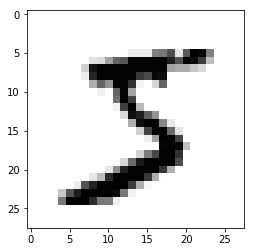

In [27]:
img = train_images[0]

cv2.normalize(img,  img, 0, 255, cv2.NORM_MINMAX)
#fig = plt.figure()

plt.imshow(255 - img.reshape((28,28)), cmap='gray')

In [40]:
img = train_images[0]
print('Prediction label:', model.predict(img.reshape((1, 28,28,1))).argmax())

Prediction label: 5


In [34]:
import numpy as np
from keras.preprocessing import image

img = image.load_img('cnn-data/animal_2.png', target_size=(28, 28,1))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [35]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [36]:
x = rgb2gray(x).reshape(1, 28, 28, 1)

In [41]:
print('Prediction label:', model.predict(x).argmax())

Prediction label: 2


### Task 5

Augment MNIST data using [ImageDataGenerator](https://keras.io/preprocessing/image/) and color inversion + visualize (or save) augmented images.
Train our model on augmented data and compare the results on your images from the web.

In [42]:
from keras.preprocessing.image import ImageDataGenerator

In [44]:
train_images.shape

(60000, 28, 28, 1)

In [45]:
X_train_inverted = 255 - train_images

In [46]:
X_train_all = np.concatenate((train_images, X_train_inverted), axis=0)
Y_train_all = np.concatenate((train_labels, train_labels), axis=0)

In [47]:
print(Y_train_all[0], Y_train_all[60000])
Y_train_all.shape, X_train_all.shape

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


((120000, 10), (120000, 28, 28, 1))

9


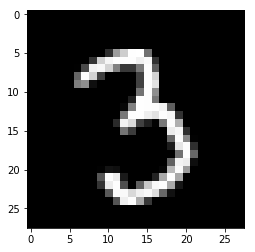

In [65]:
img = X_train_all[90000]
cv2.normalize(img,  img, 0, 255, cv2.NORM_MINMAX)
#fig = plt.figure()

plt.imshow(255 - img.reshape((28,28)), cmap='gray')
print(Y_train_all[60004].argmax())


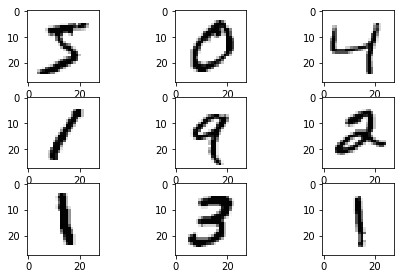

In [66]:
activation_index = 0
fig, ax = plt.subplots(3, 3, figsize=(3*2.5,3*1.5))
for row in range(0,3):
    for col in range(0,3):
        ax[row][col].imshow(X_train_inverted[activation_index].reshape((28,28)), cmap='gray')
        activation_index += 1

In [67]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False)

In [68]:
datagen.fit(X_train_inverted)

In [69]:
for x,y in datagen.flow(X_train_all, Y_train_all):
    print (x)
    break


[[[[-5.420914e+02]
   [-5.420914e+02]
   [-5.420914e+02]
   ...
   [-5.420914e+02]
   [-5.420914e+02]
   [-5.420914e+02]]

  [[-5.420914e+02]
   [-5.420914e+02]
   [-5.420914e+02]
   ...
   [-5.420914e+02]
   [-5.420914e+02]
   [-5.420914e+02]]

  [[-5.420914e+02]
   [-5.420914e+02]
   [-5.420914e+02]
   ...
   [-5.420914e+02]
   [-5.420914e+02]
   [-5.420914e+02]]

  ...

  [[-5.420914e+02]
   [-5.420914e+02]
   [-5.420914e+02]
   ...
   [-5.420914e+02]
   [-5.420914e+02]
   [-5.420914e+02]]

  [[-5.420914e+02]
   [-5.420914e+02]
   [-5.420914e+02]
   ...
   [-5.420914e+02]
   [-5.420914e+02]
   [-5.420914e+02]]

  [[-5.420914e+02]
   [-5.420914e+02]
   [-5.420914e+02]
   ...
   [-5.420914e+02]
   [-5.420914e+02]
   [-5.420914e+02]]]


 [[[ 2.758947e-01]
   [ 2.758947e-01]
   [ 2.758947e-01]
   ...
   [ 2.758947e-01]
   [ 2.758947e-01]
   [ 2.758947e-01]]

  [[ 2.758947e-01]
   [ 2.758947e-01]
   [ 2.758947e-01]
   ...
   [ 2.758947e-01]
   [ 2.758947e-01]
   [ 2.758947e-01]]

  [[ 2.

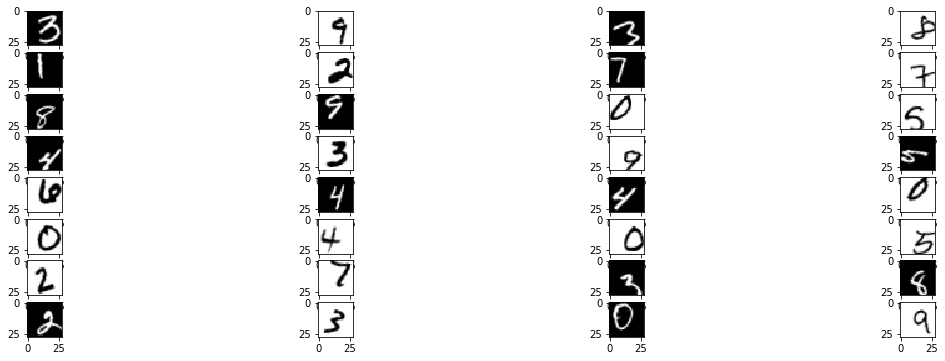

In [70]:
activation_index = 0
fig, ax = plt.subplots(8, 4, figsize=(8*2.5,4*1.5))
for row in range(0,8):
    for col in range(0,4):
        ax[row][col].imshow(x[activation_index].reshape((28,28)), cmap='gray')
        #print(y[activation_index].argmax())
        activation_index += 1

In [71]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit_generator(datagen.flow(X_train_inverted, train_labels, batch_size=32),
                    steps_per_epoch=len(X_train_inverted)/32, epochs=12)

Epoch 1/12
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0555 - acc: 0.9836
Epoch 2/12
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0545 - acc: 0.9832
Epoch 3/12
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0516 - acc: 0.9846
Epoch 4/12
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0513 - acc: 0.9846
Epoch 5/12
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0489 - acc: 0.9852
Epoch 6/12
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0477 - acc: 0.9854
Epoch 7/12
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0481 - acc: 0.9852
Epoch 8/12
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0473 - acc: 0.9865
Epoch 9/12
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0458 - acc: 0.9864
Epoch 10/12
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0469 - acc: 0.9864
Epoch 11/

In [1]:
img = X_train_all[0]
cv2.normalize(img,  img, 0, 255, cv2.NORM_MINMAX)
#fig = plt.figure()

plt.imshow(255 - img.reshape((28,28)), cmap='gray')
print(Y_train_all[60004].argmax())


NameError: name 'X_train_all' is not defined

In [73]:
img = X_train_all[90000]
print('Prediction label:', model.predict(255 - img.reshape((1, 28,28,1))).argmax())

Prediction label: 3


### Task 6
Use pretrained model to train on CIFAR-10 dataset. For that, you can try to use your CNN architecture.

In [2]:
from keras.datasets import cifar10
from keras.utils import np_utils
import numpy as np
import cv2

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Batch size 
batch_size = 32
# Image size
img_rows, img_cols = 48, 48

# Data normalization:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Labels to categorical:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
def resize_data(data):
    data_upscaled = np.zeros((data.shape[0], img_rows, img_cols, 3))
    for i, img in enumerate(data):
        large_img = cv2.resize(img, dsize=(img_rows, img_cols), interpolation=cv2.INTER_CUBIC)
        data_upscaled[i] = large_img

    return data_upscaled

In [6]:
# resize train and  test data
x_train_resized = resize_data(X_train)
x_test_resized = resize_data(X_test)

In [7]:
x_train_resized.shape

(50000, 48, 48, 3)

In [14]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential, Model
model = VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, 3))

In [15]:
for layer in model.layers:
    print(layer)
    layer.trainable = False

In [16]:
add_model = Sequential()
add_model.add(keras.layers.Flatten(input_shape=model.output_shape[1:]))
add_model.add(keras.layers.Dense(256, activation='relu'))
add_model.add(keras.layers.Dense(10, activation='softmax'))

model_cifar = Model(inputs=model.input, outputs=add_model(model.output))

In [17]:
for layer in model_cifar.layers[:-1]:
    print(layer.trainable)
    #layer.trainable = False

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [18]:
model_cifar.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

print(model_cifar.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [19]:
model_cifar.fit(x_train_resized, Y_train, epochs=8)

Epoch 1/8
50000/50000 [==============================] - 743s 15ms/step - loss: 1.2668 - acc: 0.5628
Epoch 2/8
50000/50000 [==============================] - 769s 15ms/step - loss: 1.0792 - acc: 0.6229
Epoch 3/8
50000/50000 [==============================] - 679s 14ms/step - loss: 1.0055 - acc: 0.6497
Epoch 4/8
50000/50000 [==============================] - 667s 13ms/step - loss: 0.9482 - acc: 0.6689
Epoch 5/8
50000/50000 [==============================] - 672s 13ms/step - loss: 0.8991 - acc: 0.6876
Epoch 6/8
50000/50000 [==============================] - 672s 13ms/step - loss: 0.8547 - acc: 0.7026
Epoch 7/8
50000/50000 [==============================] - 675s 14ms/step - loss: 0.8162 - acc: 0.7157
Epoch 8/8
50000/50000 [==============================] - 680s 14ms/step - loss: 0.7784 - acc: 0.7282


In [21]:
model_cifar.evaluate(x_test_resized, Y_test)

10000/10000 [==============================] - 135s 14ms/step


[1.054699058532715, 0.644]

### Task 7
Implement style transfer technique

In [22]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
model = VGG16(weights='imagenet', include_top=False)